# Prueba Técnica

**Autor:** Daniel Dávila Lesmes

**Contacto** danielandresd998@gmail.com https://www.linkedin.com/in/danielandresd/


## Caso de negocio

"La Caja Colombiana de Subsidio Familiar – Colsubsidio, es una compañía que pertenece al Sistema del Subsidio Familiar y al Sistema de Protección y Seguridad Social colombiano, que en sus más de 60 años se ha consolidado como la caja de compensación familiar de mayor cobertura del país. Su gestión, la desarrolla a través de la administración de recursos provenientes de las empresas aportantes y la prestación de servicios sociales para los trabajadores afiliados, sus familias y la población en general.

Colsubsidio ha dividido la prestación de sus servicios en once diferentes unidades especializadas de servicio (UES) que ofrecen diferentes productos.

En este caso, se requiere un análisis general del consumo individual en un periodo de tiempo y su penetración(*) en la población afiliada. Para tal fin en la carpeta data encontrará los siguientes archivos:

Persona: Datos de las personas con afiliación vigente a la caja
Empresa: Datos de la empresa aportante.
Consumo: Bases de datos del consumos individuales de los productos Colsubsidio

(*) Se define la penetración del servicio como la proporción de clientes afiliados respecto el total de clientes atendidos en un periodo de tiempo"

### Preguntas clave a responder					
	

* ¿Existen temporadas de mayor venta de productos?							
* ¿Cuál es la participación de consumo de personas afiliadas y no afiliadas?
* ¿Cuál es el consumo total por unidad de negocio?							
* ¿Cuáles son las unidades y productos de mayor uso en cada categoría?								
* Identifique los clientes (afiliados y no afiliados) con mayor frecuencia de uso y mayor valor neto de venta.
* ¿Cómo ha sido el porcentaje histórico de penetración en la población afiliada de los servicios Colsubsidio?
* ¿Cuáles son los productos más consumidos en el cada segmento poblacional?
* ¿Cuáles son las mejores empresas en cuanto a consumo individual de sus empleados?

## Desarrollo del ejercicio

### Importar librerías y módulos

In [141]:
""" Importar modulos generales"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [142]:
"""Importar modulos especiales"""
#Modulo para exportar a imagen dataframes
import matplotlib.ticker as ticker

### Extraccion de datos

In [143]:
"""Definir rutas de ubicación de los archivos"""
data_folder= 'Data/' #Carpeta donde se almacenan los datasets de caracter lectura
img_folder='public/Graficos/' #Carpeta para almacenar las gráficas generadas
#Ruta de los archivos datasets
consumos_path=data_folder+"Consumo.csv"
empresas_path=data_folder+"Empresa.csv"
personas_path=data_folder+"Persona.csv"

In [144]:
"""Crear DataFrames"""
consumos_df=pd.read_csv(consumos_path,";")
empresas_df=pd.read_csv(empresas_path,";")
personas_df=pd.read_csv(personas_path,";")

C:\Users\danie\AppData\Local\Temp\ipykernel_17968\514770695.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  consumos_df=pd.read_csv(consumos_path,";")
C:\Users\danie\AppData\Local\Temp\ipykernel_17968\514770695.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  empresas_df=pd.read_csv(empresas_path,";")
C:\Users\danie\AppData\Local\Temp\ipykernel_17968\514770695.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  personas_df=pd.read_csv(personas_path,";")


### Transformacion de datos

#### Tabla Empresas

In [145]:
"""Verificar datos nulos por columna"""
empresas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74045 entries, 0 to 74044
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_empresa           74045 non-null  int64 
 1   Piramide1            74045 non-null  object
 2   Piramide2            74045 non-null  object
 3   cx_empresa           41522 non-null  object
 4   cy_empresa           41522 non-null  object
 5   DepartamentoEmpresa  41802 non-null  object
 6   MunicipioEmpresa     41802 non-null  object
 7   SectorCIIU           74045 non-null  object
 8   DescripcionCIIU      74045 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.1+ MB


In [146]:
"""Eliminar columnas que no se van a utilizar"""
empresas_df = empresas_df.drop(['cx_empresa', 'cy_empresa'], axis=1)

In [147]:
"""Validar que no existan registros con id duplicado"""
empresas_df['id_empresa'].duplicated().sum()

0

In [148]:
"""Llenar campos vacíos de las columnas Dpto y municipio"""
empresas_df['DepartamentoEmpresa'] = empresas_df['DepartamentoEmpresa'].fillna('DESCONOCIDO')
empresas_df['MunicipioEmpresa'] = empresas_df['MunicipioEmpresa'].fillna('DESCONOCIDO')

In [149]:
"""Unificar formato de los campos de texto"""
empresas_df['DepartamentoEmpresa']=empresas_df['DepartamentoEmpresa'].str.strip().str.upper()
empresas_df['MunicipioEmpresa']=empresas_df['MunicipioEmpresa'].str.strip().str.upper()
empresas_df['Piramide1']=empresas_df['Piramide1'].str.strip().str.upper()
empresas_df['Piramide2']=empresas_df['Piramide2'].str.strip().str.upper()

In [150]:
"""Ver categorias de empresa (Validar que no existan repetidos)"""
print(list(empresas_df['Piramide1'].unique()))
print(list(empresas_df['Piramide2'].unique()))

['4 MICRO', '1 EMP GRANDES', '3 EMPRESAS PYMES', '2 EMP MEDIO', '5 MICRO']
['4.5 TRANSACCIONAL', '4.8 TRANSACCIONAL - PENSIONADO', '1.2 PREMIUM', '3.2 VIP ESTÁNDAR', '4.1 ESTÁNDAR', '3.1 VIP', '4.7 TRANSACCIONAL - INDEPENDIENTE', '2.1 GOLD', '4.3 TRANS.JURIDICA ENT. 11 A 99 TRAB.', '2.2 SILVER', '4.6 TRANSACCIONAL - FACULTATIVO', '1.1 PLATINUM', '4.2 TRANS. MAS DE 100 TRAB.', '5.1 COLSUBSIDIO', '4.4 TRANS.NATURAL ENT. 11 A 99 TRAB.']


#### Tabla Personas

In [151]:
"""Ver informacion de la tabla personas"""
personas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594191 entries, 0 to 594190
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NumIdPersona             594191 non-null  int64  
 1   id_empresa               594191 non-null  int64  
 2   Genero                   594191 non-null  object 
 3   FechaNacimiento          594191 non-null  object 
 4   Edad                     594191 non-null  int64  
 5   Salario                  594191 non-null  int64  
 6   Categoria                594191 non-null  object 
 7   Segmento_poblacional     594191 non-null  object 
 8   segmento_grupo_familiar  455668 non-null  object 
 9   cx_persona               405040 non-null  object 
 10  cy_persona               405040 non-null  object 
 11  DepartamentoPersona      466530 non-null  object 
 12  MunicipioPersona         466530 non-null  object 
 13  EstratoPersona           369316 non-null  float64
dtypes: f

In [152]:
"""Cambiar tipo de datos de las columnas que no tienen el tipo correcto"""
personas_df['EstratoPersona']=personas_df['EstratoPersona'].astype('Int64')
personas_df['FechaNacimiento']=personas_df['FechaNacimiento'].astype('datetime64[ns]')

In [153]:
"""Contar valores nulos"""
personas_df.isnull().sum()/len(personas_df)*100 ##Porcentaje de datos nulos

NumIdPersona                0.000000
id_empresa                  0.000000
Genero                      0.000000
FechaNacimiento             0.000000
Edad                        0.000000
Salario                     0.000000
Categoria                   0.000000
Segmento_poblacional        0.000000
segmento_grupo_familiar    23.312874
cx_persona                 31.833367
cy_persona                 31.833367
DepartamentoPersona        21.484842
MunicipioPersona           21.484842
EstratoPersona             37.845575
dtype: float64

In [154]:
"""Eliminar columnas con vacíos que no son representativas para el análisis"""
personas_df = personas_df.drop(['cx_persona', 'cy_persona'], axis=1)

In [155]:
"""Validar id persona que no tenga duplicados"""
personas_df['NumIdPersona'].duplicated().sum()

0

In [156]:
"""Ver campos"""
personas_df.head(2)

,NumIdPersona,id_empresa,Genero,FechaNacimiento,Edad,Salario,Categoria,Segmento_poblacional,segmento_grupo_familiar,DepartamentoPersona,MunicipioPersona,EstratoPersona
0,1174205,56353,F,1968-01-01,52,1800000,B,Medio,NaN,NaN,NaN,<NA>
1,800759,13625,M,1930-11-10,88,4139944,C,Medio,PAREJA CONYUGAL,DISTRITO CAPITAL,BOGOTA D.C.,5


In [157]:
"""Transformar formatos de los datos"""
personas_df['Genero']=personas_df['Genero'].str.strip().str.upper()
personas_df['Categoria']=personas_df['Categoria'].str.strip().str.upper()
personas_df['Segmento_poblacional']=personas_df['Segmento_poblacional'].str.strip().str.upper()
personas_df['segmento_grupo_familiar']=personas_df['segmento_grupo_familiar'].str.strip().str.upper()
personas_df['DepartamentoPersona']=personas_df['DepartamentoPersona'].str.strip().str.upper()
personas_df['MunicipioPersona']=personas_df['MunicipioPersona'].str.strip().str.upper()

In [158]:
"""Verificar que las variavles categoricas no queden con duplicados"""
print(list(personas_df['Genero'].unique()))
print(list(personas_df['Categoria'].unique()))
print(list(personas_df['Segmento_poblacional'].unique()))
print(list(personas_df['segmento_grupo_familiar'].unique()))
print(list(personas_df['EstratoPersona'].unique()))

['F', 'M', '1']
['B', 'C', 'A']
['MEDIO', 'BÁSICO', 'ALTO', 'JOVEN']
[nan, 'PAREJA CONYUGAL', 'FAMILIA NUCLEAR INTEGRAL', 'FAMILIA MONOPARENTERAL', 'FAMILIA MONPARENTERAL AMPLIADA', 'FAMILIA NUCLEAR AMPLIADA', 'AFILIADO SIN GRUPO FAMILIAR']
[<NA>, 5, 4, 3, 2, 6, 0, 1]


In [159]:
"""Llenar registros vacios de la categoría segmento grupo familiar"""
personas_df['segmento_grupo_familiar'] = personas_df['segmento_grupo_familiar'].fillna('DESCONOCIDO')
print(list(personas_df['segmento_grupo_familiar'].unique()))

['DESCONOCIDO', 'PAREJA CONYUGAL', 'FAMILIA NUCLEAR INTEGRAL', 'FAMILIA MONOPARENTERAL', 'FAMILIA MONPARENTERAL AMPLIADA', 'FAMILIA NUCLEAR AMPLIADA', 'AFILIADO SIN GRUPO FAMILIAR']


#### Tabla Consumos

In [160]:
consumos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984563 entries, 0 to 984562
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   NumIdPersona      984563 non-null  int64 
 1   Periodo           984563 non-null  int64 
 2   Valor             984563 non-null  object
 3   NumTransacciones  984563 non-null  int64 
 4   UES               983517 non-null  object
 5   Producto          983228 non-null  object
dtypes: int64(3), object(3)
memory usage: 45.1+ MB


In [161]:
"""Ver porcentaje de datos nulos por columna"""
print(consumos_df.isnull().sum()/len(consumos_df)*100)

NumIdPersona        0.000000
Periodo             0.000000
Valor               0.000000
NumTransacciones    0.000000
UES                 0.106240
Producto            0.135593
dtype: float64


In [162]:
"""Cambiar formato de fecha del periodo"""
consumos_df['Periodo']=pd.to_datetime(consumos_df['Periodo'], format='%Y%m')
consumos_df['Valor']=consumos_df['Valor'].str.replace(',', '.').astype(float)


In [163]:
consumos_df.head(2)

,NumIdPersona,Periodo,Valor,NumTransacciones,UES,Producto
0,708858,2020-01-01,675161.0,5,Mercadeo Social,Supermercados
1,941811,2020-02-01,30597.0,1,Mercadeo Social,Supermercados


In [164]:
"""Llenar datos nulos de las columnas UES y Supermercados"""
consumos_df['UES']=consumos_df['UES'].fillna('DESCONOCIDO')
consumos_df['Producto']=consumos_df['Producto'].fillna('DESCONOCIDO')
"""Unificar formato de texto"""
consumos_df['UES']=consumos_df['UES'].str.strip().str.upper()
consumos_df['Producto']=consumos_df['Producto'].str.strip().str.upper()

In [165]:
"""Imprimir lista de categorias"""
print(list(consumos_df['Periodo'].unique()))
print(list(consumos_df['UES'].unique()))
print(list(consumos_df['Producto'].unique()))


[numpy.datetime64('2020-01-01T00:00:00.000000000'), numpy.datetime64('2020-02-01T00:00:00.000000000'), numpy.datetime64('2019-09-01T00:00:00.000000000'), numpy.datetime64('2019-11-01T00:00:00.000000000'), numpy.datetime64('2019-12-01T00:00:00.000000000'), numpy.datetime64('2019-10-01T00:00:00.000000000')]
['MERCADEO SOCIAL', 'SALUD', 'CONVENIOS DE CREDITO', 'RECREACION Y TURISMO', 'CREDITO', 'DESCONOCIDO']
['SUPERMERCADOS', 'POS', 'NO POS', 'DROGUERIAS', 'CONVENIOS', 'PISCILAGO', 'HOTEL PENALISA', 'PRACTICA DEPORTIVA', 'CLUB BELLAVISTA', 'CLUB EL CUBO', 'HOTEL ALCARAVAN', 'CLUB LA COLINA', 'CUPO DE CREDITO', 'BOSQUES DE ATHAN', 'DESCONOCIDO', 'PRACTICA RECREATIVA', 'CLUB CALLE 195', 'NO LIBRANZA', 'HIPOTECARIA', 'LIBRANZA', 'AGENCIA DE VIAJE']


### Analisis de datos

Una vez se han preparado los conjuntos de datos se procede a resolver las preguntas clave a traves de vistas y kpis que se generarán a continuación

In [166]:
"""Importar funciones especiales para graficos"""

from matplotlib.font_manager import FontProperties

In [167]:
"""Definir parámetros para gráficos e imagenes"""

col_fondo='#f0ecec'
font_path = 'public/tanseek-modern-pro-arabic-bold.ttf'
font_prop = FontProperties(fname=font_path)
ft_sz_title=30
ft_sz_label=20


In [168]:
"""Unir tablas"""

# Unir los dataframes utilizando merge
empresas_personas_join = pd.merge(empresas_df,personas_df, on='id_empresa',how='right')
empresas_personas_consumos_join= pd.merge(empresas_personas_join, consumos_df, on='NumIdPersona', how='right')

In [169]:
display(empresas_personas_consumos_join.head(5))

,id_empresa,Piramide1,Piramide2,DepartamentoEmpresa,MunicipioEmpresa,SectorCIIU,DescripcionCIIU,NumIdPersona,Genero,FechaNacimiento,...,Segmento_poblacional,segmento_grupo_familiar,DepartamentoPersona,MunicipioPersona,EstratoPersona,Periodo,Valor,NumTransacciones,UES,Producto
0,42363.0,1 EMP GRANDES,1.2 PREMIUM,DISTRITO CAPITAL,BOGOTA D.C.,"Prestación de Servicios (Educación, Banca, Com...",Establecimientos que combinan diferentes nivel...,708858,M,1966-10-09,...,MEDIO,FAMILIA NUCLEAR INTEGRAL,DISTRITO CAPITAL,BOGOTA D.C.,4,2020-01-01,675161.0,5,MERCADEO SOCIAL,SUPERMERCADOS
1,44471.0,2 EMP MEDIO,2.2 SILVER,DISTRITO CAPITAL,BOGOTA D.C.,"Prestación de Servicios (Educación, Banca, Com...",Otras actividades de servicios personales n.c.p.,941811,F,1971-01-26,...,MEDIO,FAMILIA NUCLEAR INTEGRAL,DISTRITO CAPITAL,BOGOTA D.C.,3,2020-02-01,30597.0,1,MERCADEO SOCIAL,SUPERMERCADOS
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803415,NaN,NaT,...,NaN,NaN,NaN,NaN,<NA>,2020-01-01,0.0,12,SALUD,POS
3,51711.0,2 EMP MEDIO,2.1 GOLD,DISTRITO CAPITAL,BOGOTA D.C.,Industria,"Fabricación de jabones y detergentes, preparad...",924791,F,1964-07-27,...,MEDIO,DESCONOCIDO,NaN,NaN,3,2019-09-01,0.0,2,SALUD,NO POS
4,52814.0,1 EMP GRANDES,1.1 PLATINUM,DISTRITO CAPITAL,BOGOTA D.C.,Público,Actividades ejecutivas de la administración pú...,766770,F,1968-08-02,...,MEDIO,FAMILIA MONOPARENTERAL,CUNDINAMARCA,ANAPOIMA,0,2020-02-01,36002.0,1,MERCADEO SOCIAL,SUPERMERCADOS


In [170]:
"""Llenar valores nulos"""
empresas_personas_consumos_join['Segmento_poblacional']=empresas_personas_consumos_join['Segmento_poblacional'].fillna('DESCONOCIDO')

#### ¿Existen temporadas de mayor venta de productos?

In [171]:
""" Crear pivot de consumos por periodo"""
#Calcular el numero total de transacicones por periodo
consumos_por_periodo = consumos_df.pivot_table(
    index=['Periodo'],
    values=['NumTransacciones'],
    aggfunc=['sum'])

consumos_por_periodo.columns=['Total_Transacciones']
#Agregar variacion porcentual
consumos_por_periodo['Porc_Var_Transac']=consumos_por_periodo['Total_Transacciones'].pct_change() * 100
# Calcular el valor acumulado de ventas y el promedio de pago por transaccion
consumos_por_periodo['Valor_Acumulado_Millones']= consumos_df.pivot_table(
    index=['Periodo'],
    values=['Valor'],
    aggfunc=[lambda x: round(sum(x)/1000000) ]
)
#Agregar variacion porcentual ingresos
consumos_por_periodo['Porc_Var_Val']=consumos_por_periodo['Valor_Acumulado_Millones'].pct_change() * 100

display(consumos_por_periodo)


,Total_Transacciones,Porc_Var_Transac,Valor_Acumulado_Millones,Porc_Var_Val
Periodo,,,,
2019-09-01,861849,NaN,103657,NaN
2019-10-01,860058,-0.207809,31081,-70.015532
2019-11-01,729045,-15.233042,116790,275.760111
2019-12-01,759614,4.193020,100742,-13.740902
2020-01-01,699391,-7.928106,42439,-57.873578
2020-02-01,86539,-87.626521,13354,-68.533660


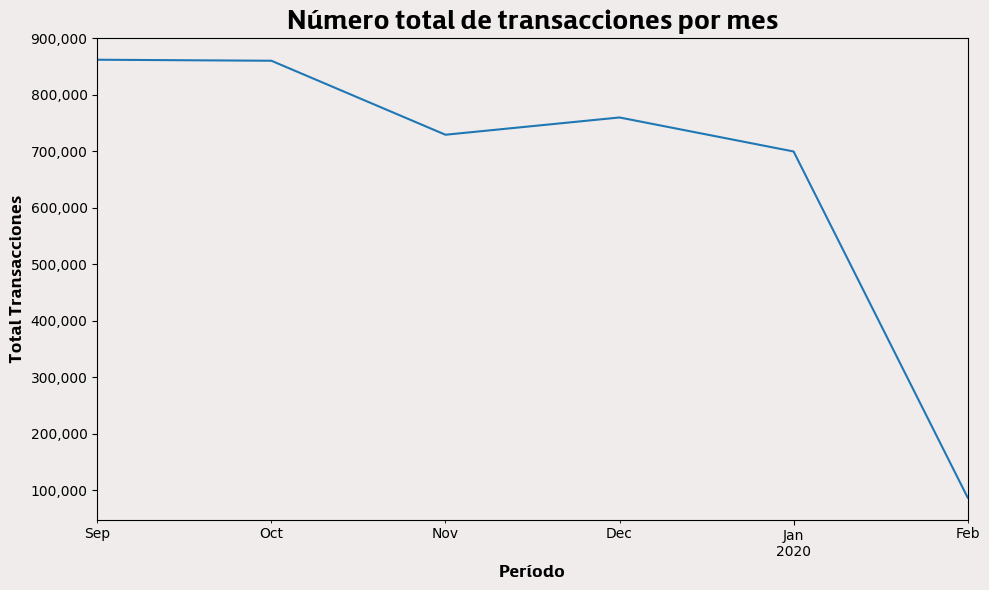

In [172]:
"""Generar grafico de serie de tiempo numero de transacciones acumuladas por mes"""
fig1, ax = plt.subplots(1, 1, figsize=(10, 6))

# Grafica la serie de tiempo de NumTransacciones
consumos_por_periodo['Total_Transacciones'].plot(ax=ax)
# Configurar Etiquetas
ax.set_title('Número total de transacciones por mes',fontproperties=font_prop,fontsize=ft_sz_title)
ax.set_ylabel('Total Transacciones',fontproperties=font_prop,fontsize=ft_sz_label)
ax.set_xlabel('Período',fontproperties=font_prop,fontsize=ft_sz_label)
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

# Configurar colores
ax.set_facecolor(col_fondo)
fig1.set_facecolor(col_fondo)
fig1.tight_layout()

# Muestra el gráfico
plt.show()

In [173]:
"""Guardar la gráfica de NumTransacciones"""
fig1.savefig(img_folder+'num_transacciones_mes.png', dpi=100, bbox_inches='tight')


In [174]:
"""Preparar dataset para mostrar con formatos"""
# Aplicar el formato de miles a las columnas Total_Transacciones y Valor Acumulado (Millones)
df_consumos=consumos_por_periodo
# Formatea la columna variacion_porcentual
df_consumos['Porc_Var_Transac'] = df_consumos['Porc_Var_Transac'].apply(lambda x: "{:.2f} %".format(x))
df_consumos['Porc_Var_Val'] = df_consumos['Porc_Var_Val'].apply(lambda x: "{:.2f} %".format(x))
df_consumos['Total_Transacciones'] = df_consumos['Total_Transacciones'].apply(lambda x: "{:,.0f}".format(x))
df_consumos['Valor_Acumulado_Millones'] = df_consumos['Valor_Acumulado_Millones'].apply(lambda x: "$ {:,.0f}".format(x))

display(df_consumos)

,Total_Transacciones,Porc_Var_Transac,Valor_Acumulado_Millones,Porc_Var_Val
Periodo,,,,
2019-09-01,"861,849",nan %,"$ 103,657",nan %
2019-10-01,"860,058",-0.21 %,"$ 31,081",-70.02 %
2019-11-01,"729,045",-15.23 %,"$ 116,790",275.76 %
2019-12-01,"759,614",4.19 %,"$ 100,742",-13.74 %
2020-01-01,"699,391",-7.93 %,"$ 42,439",-57.87 %
2020-02-01,"86,539",-87.63 %,"$ 13,354",-68.53 %


#### ¿Cuál es la participación de consumo de personas afiliadas y no afiliadas?

In [175]:
"""Determinar si un cliente esta o no afiliado"""
empresas_personas_consumos_join['Afiliacion'] = empresas_personas_consumos_join.apply(lambda x: 'AFILIADO' if pd.notnull(x['Categoria']) else 'NO AFILIADO', axis=1)

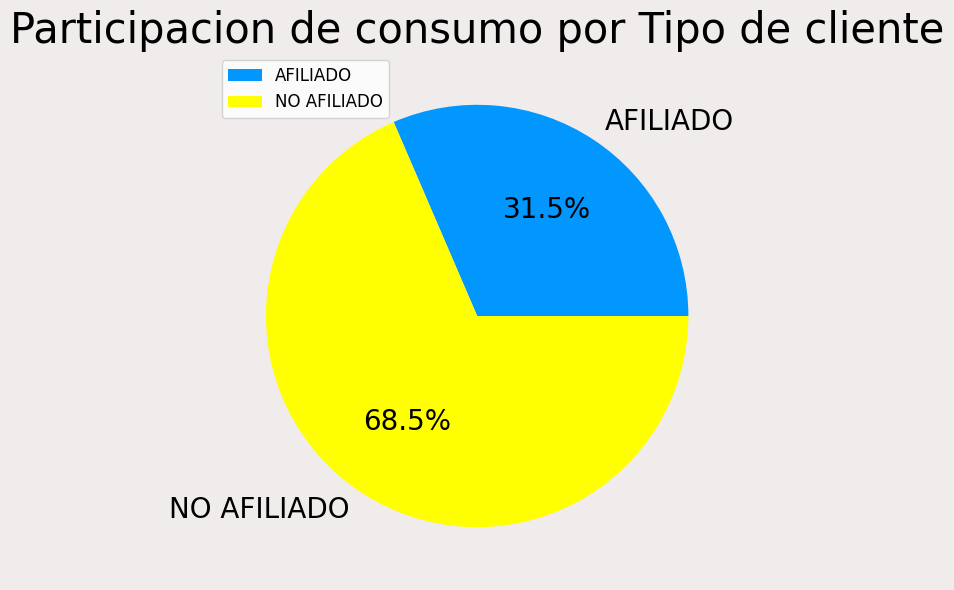

In [176]:
# Agrupar el DataFrame por "Afiliacion" y sumar "NumTransacciones"
agrupado = empresas_personas_consumos_join.groupby('Afiliacion')['NumTransacciones'].sum()

# Especificar los colores de las secciones
colors = ['#0297ff','#ffff01']
fig2, ax = plt.subplots(figsize=(8, 6), facecolor=col_fondo)

# Crear el gráfico de torta
ax.pie(agrupado,labels=agrupado.index, colors=colors, autopct='%1.1f%%',textprops={'fontsize': ft_sz_label})


# Agregar título y leyenda
ax.set_title('Participacion de consumo por Tipo de cliente', fontsize=ft_sz_title)
ax.legend(fontsize=12)

fig2.tight_layout()

# Mostrar el gráfico
plt.show()

In [177]:
"""Guardar la gráfica de NumTransacciones"""
fig2.savefig(img_folder+'participacion_consumo_tipo_cliente.png', dpi=100, bbox_inches='tight')

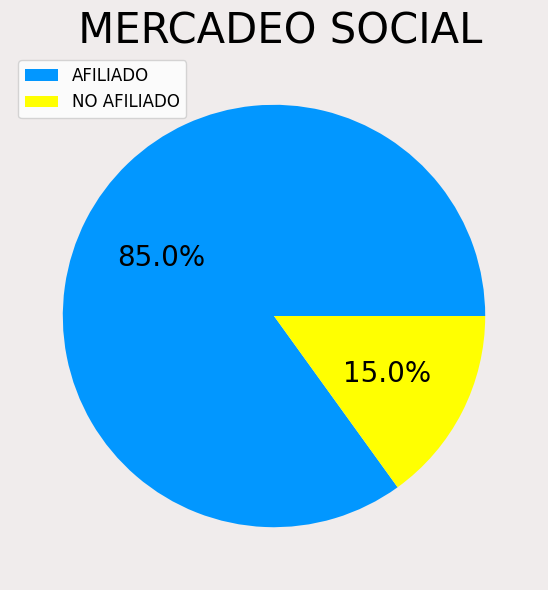

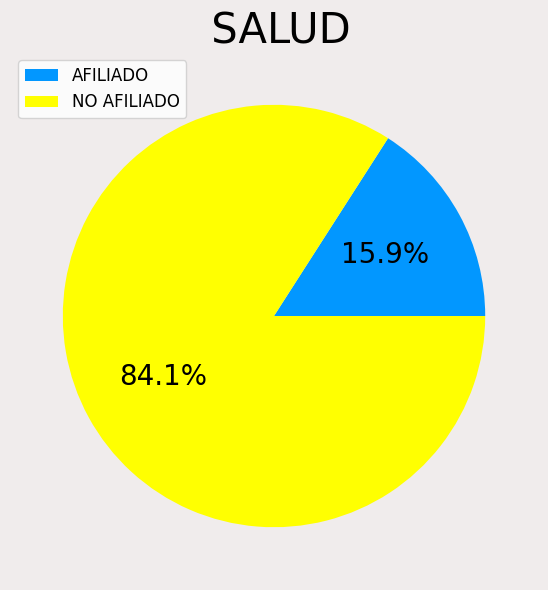

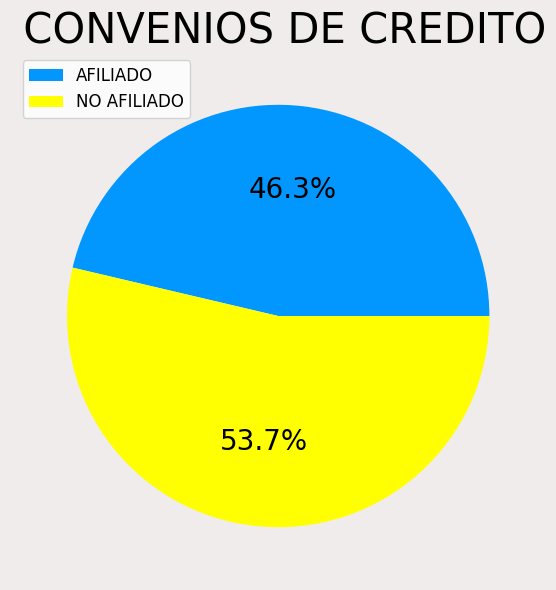

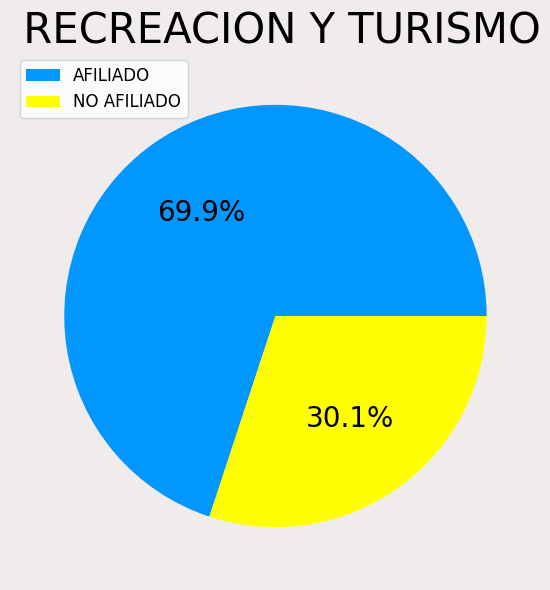

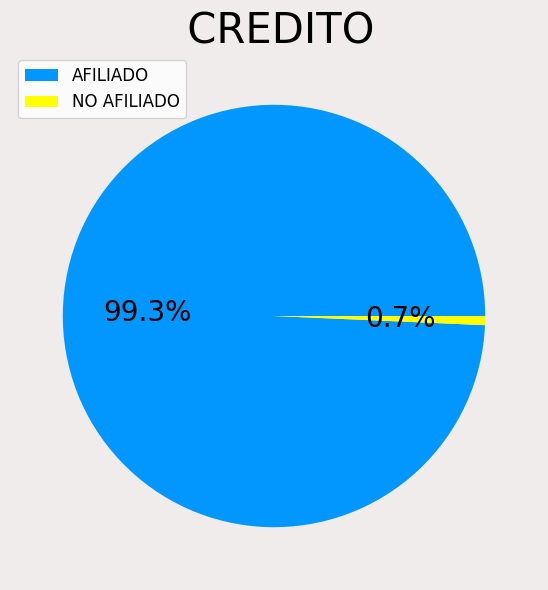

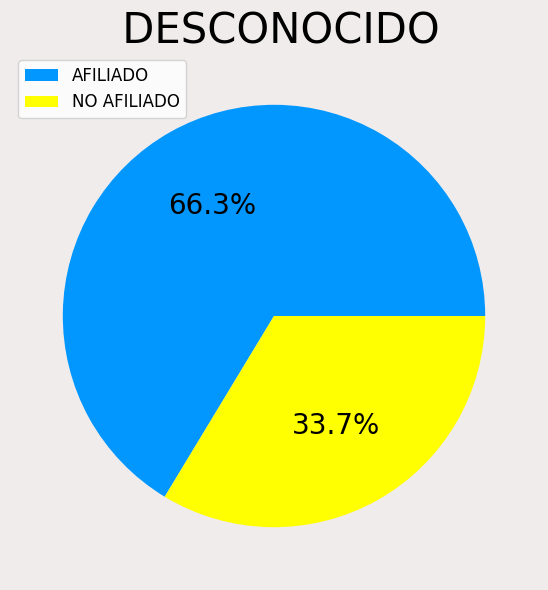

In [178]:
# Agrupar el DataFrame por "UES" y "Afiliacion" y sumar "NumTransacciones"
agrupado_2 = empresas_personas_consumos_join.groupby(['UES', 'Afiliacion'])['NumTransacciones'].sum()

# Obtener la lista de UES únicas
ues_list = empresas_personas_consumos_join['UES'].unique()

# Especificar los colores de las secciones
colors = ['#0297ff', '#ffff01']

# Configurar el tamaño de la figura
fig_size = (8, 6)

# Iterar a través de cada UES y crear un gráfico de torta
for ues in ues_list:
    # Filtrar el DataFrame para la UES actual
    df = agrupado_2.loc[ues]
    
    # Crear el gráfico de torta
    fig4, ax = plt.subplots(figsize=fig_size,facecolor=col_fondo)
    ax.pie(df, colors=colors, autopct='%1.1f%%', textprops={'fontsize': ft_sz_label})
    ax.set_title(f' {ues}', fontsize=ft_sz_title)
    ax.legend(loc='upper left', fontsize=12, labels=df.index)
    fig4.savefig(img_folder+f'ues_afiliados_{ues}.png', dpi=100)
    fig4.tight_layout()
    
    # Mostrar el gráfico
    plt.show()


#### ¿Cuales son los clientes con mayor consumo por uso y valor neto?

In [179]:
"""Clientes Afiliados"""
afiliados_mas_fieles=empresas_personas_consumos_join.query('Afiliacion=="AFILIADO"')\
    .pivot_table(
    index=['NumIdPersona'],
    values=['NumTransacciones'],
    aggfunc=['sum'])
afiliados_mas_fieles.columns=['Total_Transacciones']

afiliados_mas_fieles['Valor_Acumulado']= empresas_personas_consumos_join.pivot_table(
    index=['NumIdPersona'],
    values=['Valor'],
    aggfunc=[lambda x: round(sum(x)) ])

    

In [180]:
"""Clientes No Afiliados"""
no_afiliados_mas_fieles=empresas_personas_consumos_join.query('Afiliacion=="NO AFILIADO"')\
    .pivot_table(
    index=['NumIdPersona'],
    values=['NumTransacciones'],
    aggfunc=['sum'])
no_afiliados_mas_fieles.columns=['Total_Transacciones']

no_afiliados_mas_fieles['Valor_Acumulado']= empresas_personas_consumos_join.pivot_table(
    index=['NumIdPersona'],
    values=['Valor'],
    aggfunc=[lambda x: round(sum(x)) ])

In [181]:
"""Top 10 clientes afiliados por uso y valor"""

afiliados_mas_fieles.sort_values(by='Total_Transacciones', ascending=False, inplace=True)
display(afiliados_mas_fieles.head(10)) #Organizado por uso

afiliados_mas_fieles.sort_values(by='Valor_Acumulado', ascending=False, inplace=True)
display(afiliados_mas_fieles.head(10)) #Organizado por valor


,Total_Transacciones,Valor_Acumulado
NumIdPersona,,
111753,1363,64753230
1255686,542,51074837
1123076,453,23862412
1429605,452,33947913
714096,442,31710223
1325119,355,30066849
842463,334,25899204
1327754,332,26270790
1367473,328,33917033


,Total_Transacciones,Valor_Acumulado
NumIdPersona,,
1226697,10,148420895
1234267,2,141670922
657444,3,110096706
371452,115,104205801
150989,26,102769812
1251524,1,96000000
1298041,1,93000000
890323,1,83343153
1324720,8,82489378


In [182]:
"""Top 10 clientes afiliados por uso y valor"""

no_afiliados_mas_fieles.sort_values(by='Total_Transacciones', ascending=False, inplace=True)
display(no_afiliados_mas_fieles.head(10)) #Organizado por uso

no_afiliados_mas_fieles.sort_values(by='Valor_Acumulado', ascending=False, inplace=True)
display(no_afiliados_mas_fieles.head(10)) #Organizado por valor

,Total_Transacciones,Valor_Acumulado
NumIdPersona,,
1437515,68354,152900262877
2,9340,62381980956
1404625,5172,-14904372
1288928,3627,67708036
1401851,3439,43776742568
774189,2881,51424995
739121,2639,55520629
883007,2390,72653294
949197,2054,50074380


,Total_Transacciones,Valor_Acumulado
NumIdPersona,,
1437515,68354,152900262877
2,9340,62381980956
1401851,3439,43776742568
1336396,869,8224192798
433271,236,566472865
1408727,126,343695549
369315,66,207967583
1199573,558,112918323
495804,502,112604315


#### ¿Cuáles son los productos más consumidos en el cada segmento poblacional?

In [183]:

productos_mas_usados=empresas_personas_consumos_join\
    .pivot_table(
    index=['Segmento_poblacional','UES','Producto'],
    values=['NumTransacciones'],
    aggfunc=['sum'])
productos_mas_usados.columns=['Total_transacciones']
productos_mas_usados= productos_mas_usados.sort_values('Total_transacciones', ascending=False)
display(productos_mas_usados)


,,,Total_transacciones
Segmento_poblacional,UES,Producto,
DESCONOCIDO,SALUD,POS,2410234
BÁSICO,SALUD,POS,254822
MEDIO,MERCADEO SOCIAL,SUPERMERCADOS,205989
BÁSICO,MERCADEO SOCIAL,SUPERMERCADOS,151591
MEDIO,SALUD,POS,139105
...,...,...,...
DESCONOCIDO,CREDITO,NO LIBRANZA,8
ALTO,CREDITO,NO LIBRANZA,4
DESCONOCIDO,CREDITO,HIPOTECARIA,2


C:\Users\danie\AppData\Local\Temp\ipykernel_17968\3169593128.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


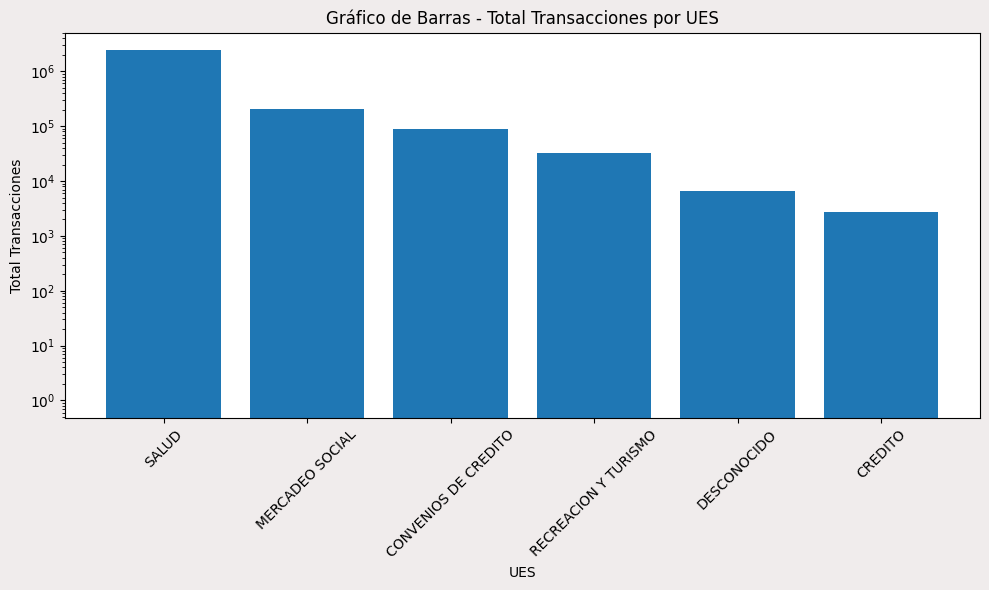

In [184]:
"""UES con mayor uso"""

fig6, ax = plt.subplots(figsize=(10, 6), facecolor=col_fondo)

ax.bar(productos_mas_usados.index.get_level_values('UES'), productos_mas_usados['Total_transacciones'])


# Agregar etiquetas y título
ax.set_xlabel('UES')
ax.set_ylabel('Total Transacciones')
ax.set_title('Gráfico de Barras - Total Transacciones por UES')
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig6.tight_layout()
# Mostrar el gráfico
plt.show()
#Guardar el grafico
fig6.savefig(img_folder+f'ues.png', dpi=100)


# Mostrar el gráfico
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_17968\122356314.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


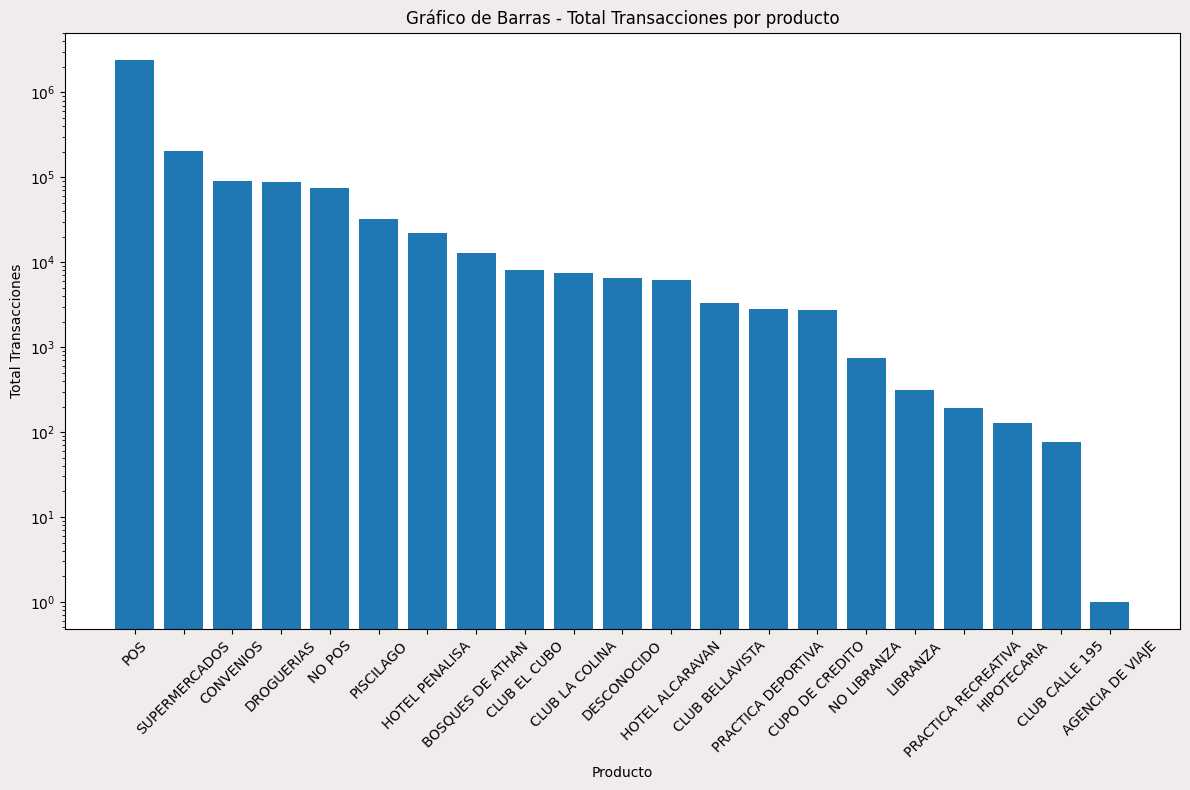

In [185]:
"""Productos con mayor uso"""

fig7, ax = plt.subplots(figsize=(12, 8), facecolor=col_fondo)

ax.bar(productos_mas_usados.index.get_level_values('Producto'), productos_mas_usados['Total_transacciones'])


# Agregar etiquetas y título
ax.set_xlabel('Producto')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Total Transacciones')
ax.set_title('Gráfico de Barras - Total Transacciones por producto')
ax.set_yscale('log')
fig7.tight_layout()

#Guardar el grafico
fig7.savefig(img_folder+f'productos.png', dpi=100)



# Mostrar el gráfico
plt.show()



['MERCADEO SOCIAL' 'SALUD' 'CONVENIOS DE CREDITO' 'RECREACION Y TURISMO'
 'CREDITO' 'DESCONOCIDO']


C:\Users\danie\AppData\Local\Temp\ipykernel_17968\1207196129.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


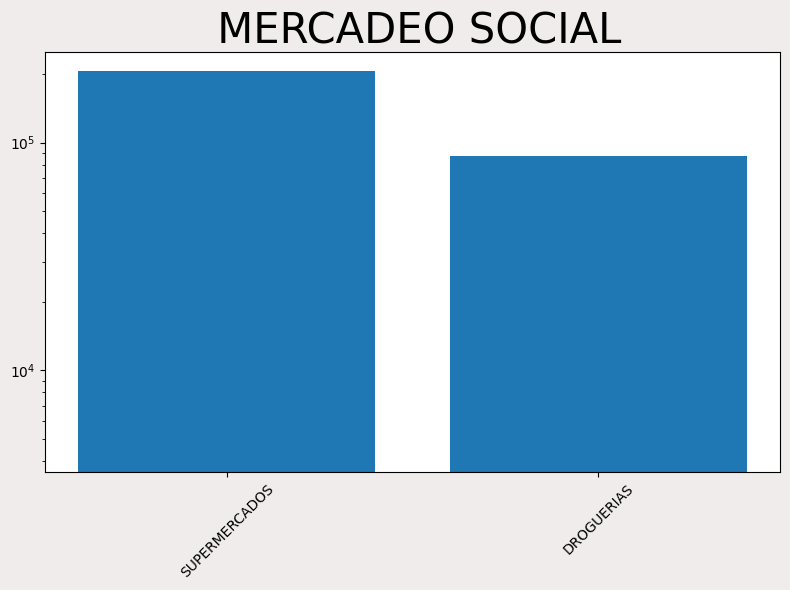

C:\Users\danie\AppData\Local\Temp\ipykernel_17968\1207196129.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


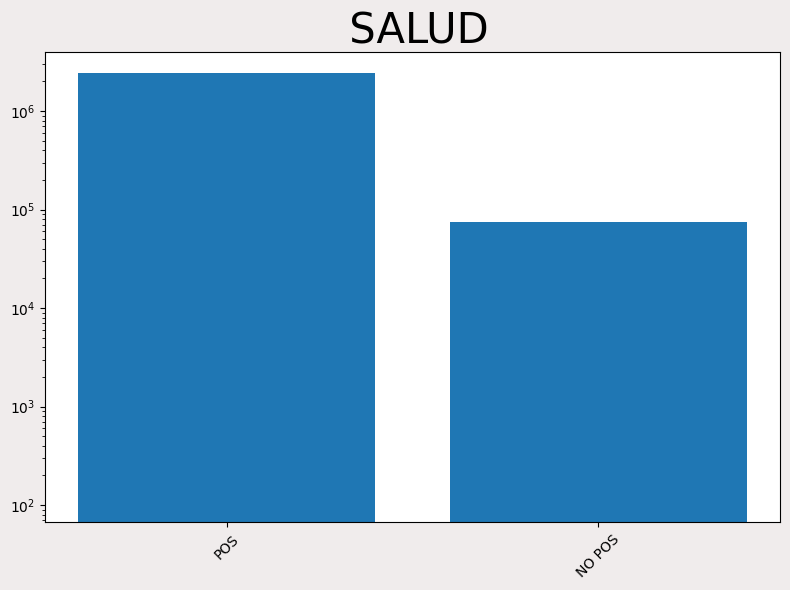

C:\Users\danie\AppData\Local\Temp\ipykernel_17968\1207196129.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


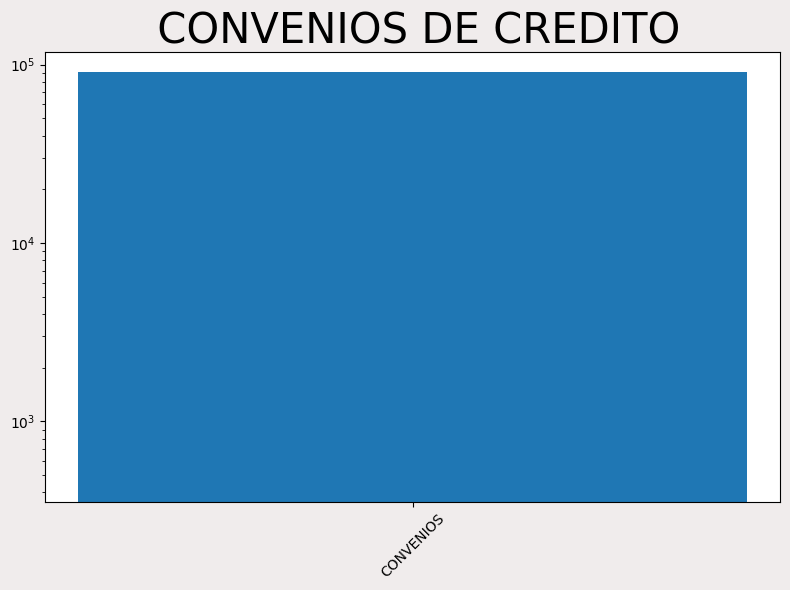

C:\Users\danie\AppData\Local\Temp\ipykernel_17968\1207196129.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


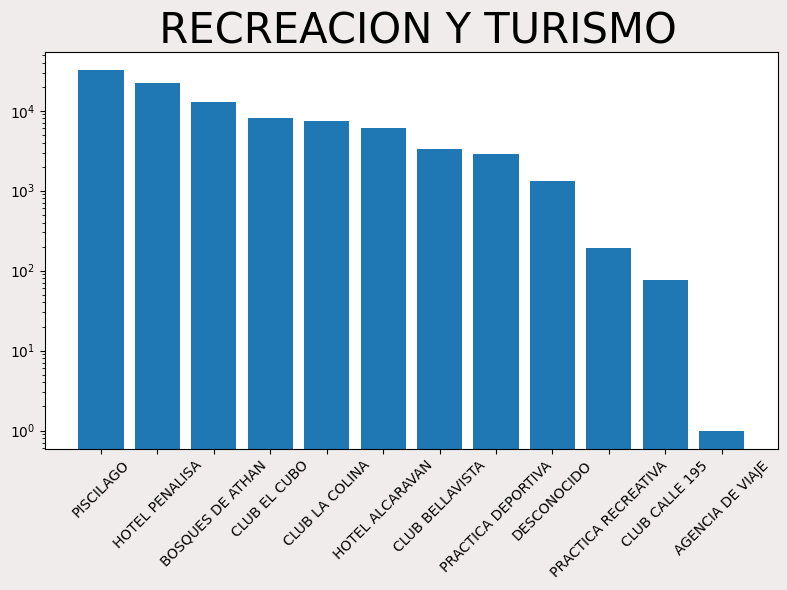

C:\Users\danie\AppData\Local\Temp\ipykernel_17968\1207196129.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


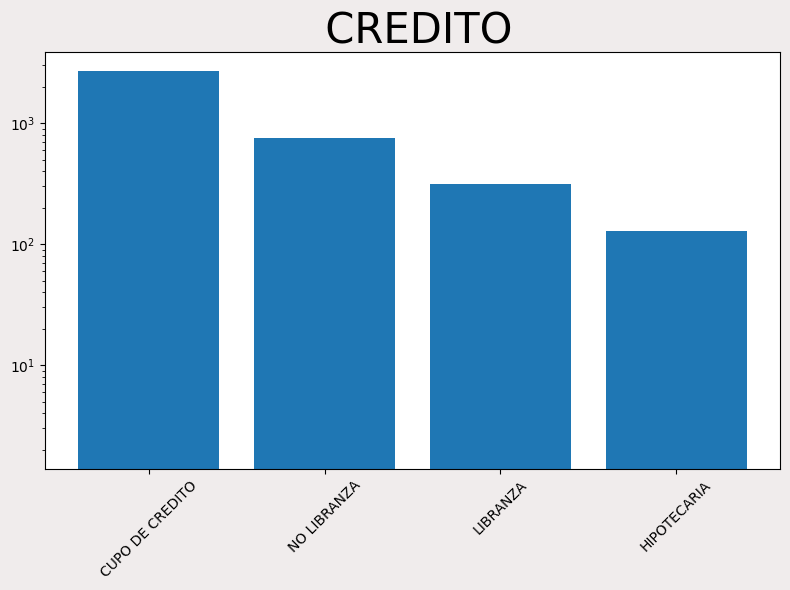

C:\Users\danie\AppData\Local\Temp\ipykernel_17968\1207196129.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


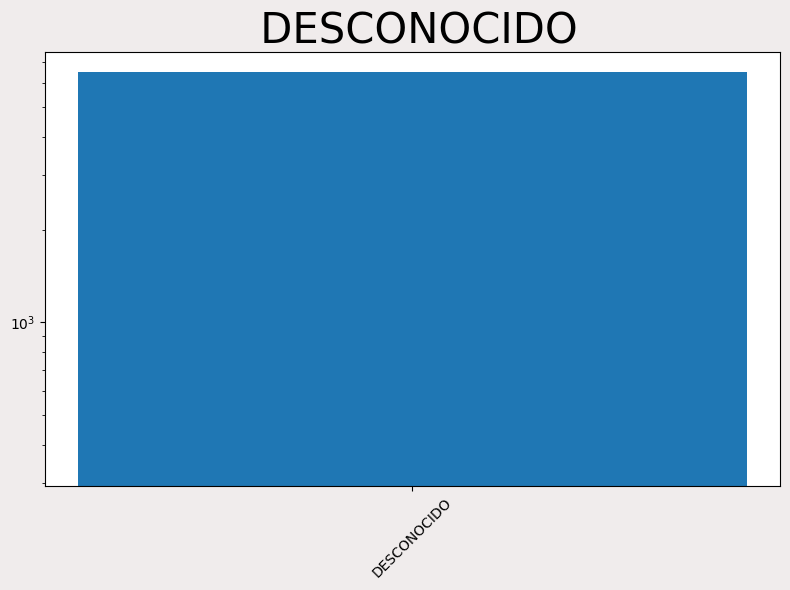

In [209]:

# Obtener la lista de UES únicas
ues_list = empresas_personas_consumos_join['UES'].unique()
print(ues_list)
# Especificar los colores de las secciones
colors = ['#0297ff', '#ffff01']

# Configurar el tamaño de la figura
fig_size = (8, 6)

# Iterar a través de cada UES y crear un gráfico de torta
for ues in ues_list:
    # Filtrar el DataFrame para la UES actual
    df = productos_mas_usados.loc[productos_mas_usados.index.get_level_values('UES') == ues]

    # Crear el gráfico de torta
    fig5, ax = plt.subplots(figsize=fig_size,facecolor=col_fondo)
    ax.bar(df.index.get_level_values('Producto'), df['Total_transacciones'])
    ax.set_title(f' {ues}', fontsize=ft_sz_title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yscale('log')
    
    fig5.savefig(img_folder+f'productos_por_{ues}.png', dpi=100)
    fig5.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

In [207]:
df = productos_mas_usados.loc[productos_mas_usados.index.get_level_values('UES') == ues]
df

Total_transacciones
Segmento_poblacional UES             Producto                          
MEDIO                MERCADEO SOCIAL SUPERMERCADOS               205989
BÁSICO               MERCADEO SOCIAL SUPERMERCADOS               151591
MEDIO                MERCADEO SOCIAL DROGUERIAS                   87425
DESCONOCIDO          MERCADEO SOCIAL DROGUERIAS                   55089
                                     SUPERMERCADOS                42320
BÁSICO               MERCADEO SOCIAL DROGUERIAS                   39988
JOVEN                MERCADEO SOCIAL SUPERMERCADOS                37181
                                     DROGUERIAS                   18348
ALTO                 MERCADEO SOCIAL DROGUERIAS                    4967
                                     SUPERMERCADOS                 4339

#### ¿Cuáles son las mejores empresas en cuanto a consumo individual de sus empleados?

In [187]:
empresas_con_mejor_reputacion=empresas_personas_consumos_join.query('id_empresa.notna()')\
    .pivot_table(
    index=['id_empresa'],
    values=['NumTransacciones'],
    aggfunc=['sum'])
empresas_con_mejor_reputacion.columns=['Total_transacciones']

empresas_con_mejor_reputacion['Valor_Acumulado']= empresas_personas_consumos_join.pivot_table(
    index=['id_empresa'],
    values=['Valor'],
    aggfunc=[lambda x: round(sum(x)) ])

"""Convertir a entero en id_persona"""


empresas_con_mejor_reputacion.index = empresas_con_mejor_reputacion.index.astype(int)
empresas_con_mejor_reputacion.index = empresas_con_mejor_reputacion.index.astype(str)


In [188]:
empresas_con_mejor_reputacion = empresas_con_mejor_reputacion.sort_values('Total_transacciones', ascending=False)
display(empresas_con_mejor_reputacion)

,Total_transacciones,Valor_Acumulado
id_empresa,,
49567,65342,5164507277
52814,18570,1866318309
42962,9474,858191508
57093,8453,416613446
49447,7981,651067797
...,...,...
20235,1,14580
20234,1,33500
55464,1,199119


In [189]:
empresas_con_mejor_reputacion=empresas_con_mejor_reputacion.head(15)
display(empresas_con_mejor_reputacion)

,Total_transacciones,Valor_Acumulado
id_empresa,,
49567,65342,5164507277
52814,18570,1866318309
42962,9474,858191508
57093,8453,416613446
49447,7981,651067797
43336,7485,996876182
43593,6165,505087848
52623,5494,459084015
57848,5212,572704967


C:\Users\danie\AppData\Local\Temp\ipykernel_17968\460092572.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


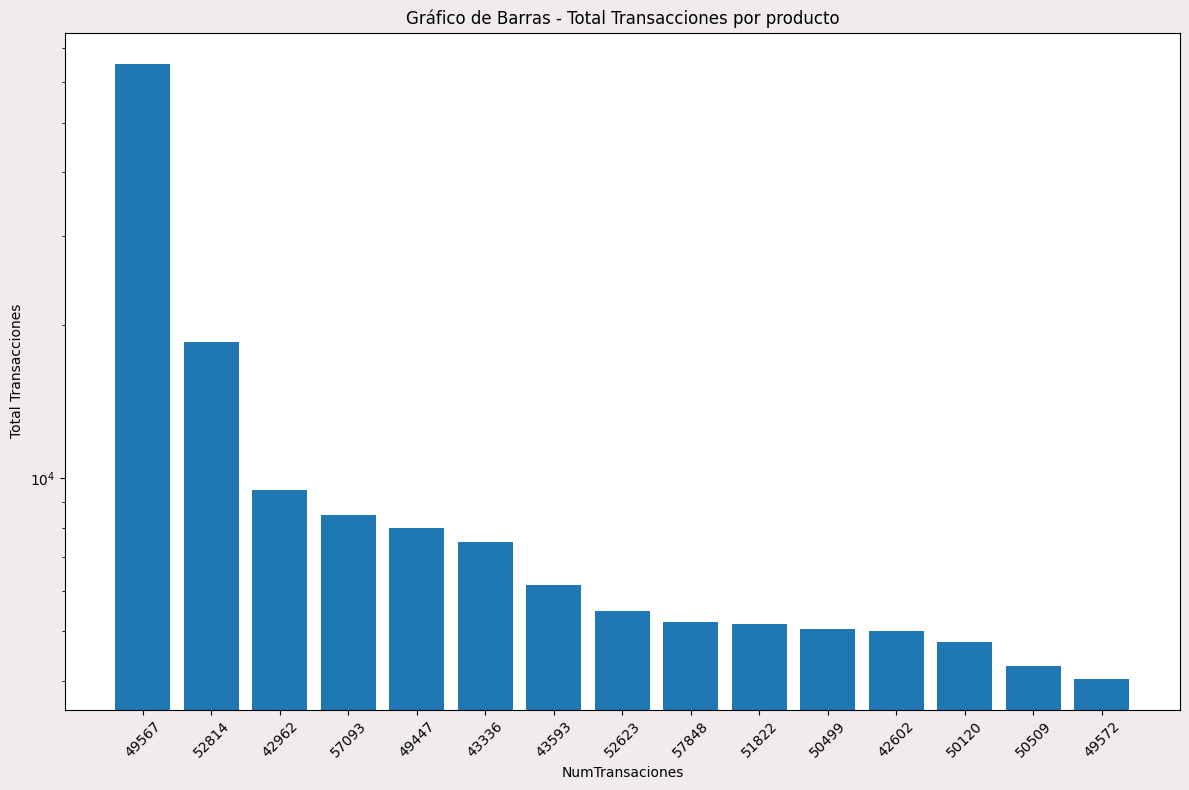

In [190]:
"""Productos con mayor uso"""

# Crear el gráfico de barras
fig8, ax = plt.subplots(figsize=(12, 8), facecolor=col_fondo)
ax.bar(empresas_con_mejor_reputacion.index.get_level_values('id_empresa'), empresas_con_mejor_reputacion['Total_transacciones'])

# Configurar etiquetas, título y ajustes del gráfico
ax.set_xlabel('NumTransaciones')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Total Transacciones')
ax.set_title('Gráfico de Barras - Total Transacciones por producto')
ax.set_yscale('log')
fig8.tight_layout()

# Guardar el gráfico como imagen
fig8.savefig(img_folder + 'empresas_con_mejor_reputacion.png', dpi=100)

# Mostrar el gráfico
plt.show()




